# pycaret

In [1]:

!pip install pymysql

     |████████████████████████████████| 319 kB 14.9 MB/s 
     |████████████████████████████████| 2.0 MB 89.4 MB/s 
     |████████████████████████████████| 1.3 MB 85.1 MB/s 
     |████████████████████████████████| 86 kB 8.7 MB/s 
     |████████████████████████████████| 261 kB 93.8 MB/s 
     |████████████████████████████████| 6.8 MB 76.2 MB/s 
     |████████████████████████████████| 116 kB 79.4 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 16.5 MB 70.0 MB/s 
     |████████████████████████████████| 167 kB 94.9 MB/s 
     |████████████████████████████████| 1.7 MB 82.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 10.9 MB 76.9 MB/s 
     |████████████████████████████████| 102 kB 16.2 MB/s 
     |████████████████████████████████| 303 kB 99.6 MB/s 
     |███████████████

     |████████████████████████████████| 43 kB 2.5 MB/s 


In [1]:
import pandas as pd
import pycaret
from pycaret.datasets import get_data 
from pycaret.classification import *
from pycaret.utils import check_metric
import pymysql

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#host = '172.20.62.56'
#port = 3306
#username = 'student'
#password = '1234'
#db = 'mogis'

#conn = pymysql.connect(host=host, port=port, user=username, password=password, db=db)
#sql_state = 'select * from firecount;'

#df = pd.read_sql_query(sql_state, conn)

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/220408_mini_project/data/day_weather_firecount2.csv', encoding='cp949')

In [4]:
df1

,area_code,area,date,max_temp,day_rain,max_wind,min_humidity,counts
0,90,강원,2011-01-01,1.7,1.8,6.3,31.0,0
1,90,강원,2011-01-02,6.1,1.4,4.1,22.0,0
2,90,강원,2011-01-03,3.8,8.8,3.3,59.0,0
3,90,강원,2011-01-04,6.3,0.0,3.9,20.0,0
4,90,강원,2011-01-05,3.8,0.0,7.7,28.0,0
...,...,...,...,...,...,...,...,...
342990,295,경남,2020-12-27,6.0,7.8,1.8,62.0,3
342991,295,경남,2020-12-28,11.5,0.0,2.0,60.0,4
342992,295,경남,2020-12-29,11.2,6.6,3.0,59.0,0
342993,295,경남,2020-12-30,1.6,0.6,7.3,43.0,2


In [5]:
df2 = df1[df1['counts'] != 0]

In [6]:
df2

,area_code,area,date,max_temp,day_rain,max_wind,min_humidity,counts
21,90,강원,2011-01-22,3.7,0.0,6.7,20.0,1
30,90,강원,2011-01-31,5.6,0.0,5.2,15.0,2
31,90,강원,2011-02-01,7.6,0.0,4.6,25.0,1
41,90,강원,2011-02-11,0.9,33.5,4.5,78.0,1
67,90,강원,2011-03-09,5.8,0.0,7.7,17.0,2
...,...,...,...,...,...,...,...,...
342989,295,경남,2020-12-26,9.5,0.0,1.9,44.0,2
342990,295,경남,2020-12-27,6.0,7.8,1.8,62.0,3
342991,295,경남,2020-12-28,11.5,0.0,2.0,60.0,4
342993,295,경남,2020-12-30,1.6,0.6,7.3,43.0,2


In [7]:
clf = setup(data=df2, target='counts')

,Description,Value
0,session_id,522
1,Target,counts
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(25021, 8)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
top5 = compare_models(sort='Accuracy', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7747,0.0,0.6440,0.7725,0.7709,0.6957,0.6968,0.427
rf,Random Forest Classifier,0.7580,0.0,0.5814,0.7589,0.7496,0.6640,0.6701,0.311
dt,Decision Tree Classifier,0.6444,0.0,0.5004,0.6460,0.6439,0.5301,0.5302,0.183
gbc,Gradient Boosting Classifier,0.4576,0.0,0.2732,0.4620,0.3472,0.1166,0.1670,23.083
dummy,Dummy Classifier,0.4350,0.0,0.0231,0.1892,0.2638,0.0000,0.0000,0.016
ridge,Ridge Classifier,0.4346,0.0,0.0236,0.2312,0.2798,0.0178,0.0418,0.020
ada,Ada Boost Classifier,0.4328,0.0,0.0229,0.1888,0.2629,-0.0017,-0.0066,0.263
lr,Logistic Regression,0.4322,0.0,0.0237,0.2557,0.2810,0.0164,0.0374,6.191
lda,Linear Discriminant Analysis,0.4107,0.0,0.3983,0.2834,0.2850,0.0610,0.0830,0.147
knn,K Neighbors Classifier,0.3982,0.0,0.0497,0.3039,0.3289,0.0791,0.0869,0.260


In [45]:
top5

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=7489, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-

In [50]:
tuned_top3 = [tune_model(i) for i in top3]
blender_top3 = blend_models(estimator_list=tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4395,0.0,0.0267,0.3335,0.2743,0.0136,0.0621
1,0.4435,0.0,0.0259,0.5123,0.2860,0.0231,0.0885
2,0.4418,0.0,0.0271,0.5214,0.2820,0.0184,0.0801
3,0.4481,0.0,0.0267,0.5328,0.2958,0.0361,0.1094
4,0.4437,0.0,0.0260,0.5062,0.2846,0.0225,0.0875
5,0.4466,0.0,0.0258,0.5246,0.2904,0.0289,0.1015
6,0.4512,0.0,0.0272,0.5978,0.2986,0.0377,0.1285
7,0.4472,0.0,0.0488,0.4344,0.2922,0.0325,0.1047
8,0.4455,0.0,0.0347,0.4325,0.2872,0.0281,0.0929


In [51]:
final_model = finalize_model(blender_top3)

In [53]:
prediction = predict_model(final_model, data=df2.iloc[-100:])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.33,0,0.0559,0.2634,0.1752,0.017,0.0907


In [17]:
et_2 = create_model('et', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7608,0.0,0.5891,0.7606,0.7589,0.6788,0.6794
1,0.7619,0.0,0.6434,0.7590,0.7582,0.6789,0.6799
2,0.7691,0.0,0.6387,0.7668,0.7647,0.6867,0.6882
3,0.7756,0.0,0.6824,0.7735,0.7731,0.6993,0.6996
4,0.7604,0.0,0.6310,0.7568,0.7562,0.6759,0.6770
Mean,0.7656,0.0,0.6369,0.7633,0.7622,0.6839,0.6848
Std,0.0059,0.0,0.0298,0.0061,0.0061,0.0085,0.0083


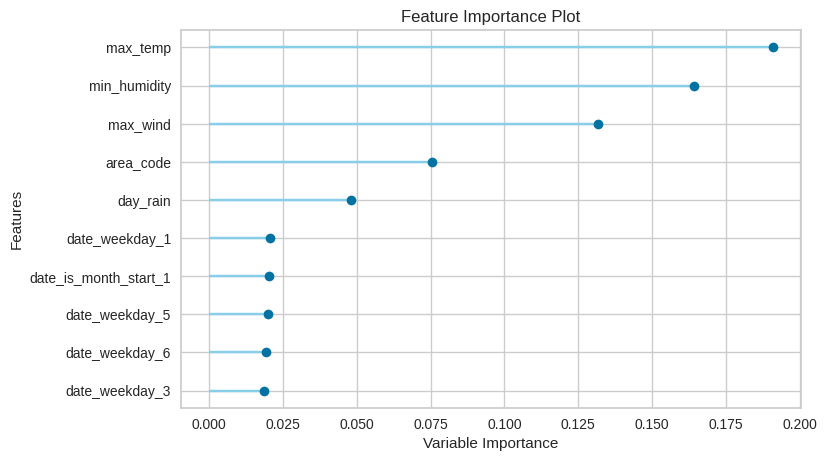

In [23]:
plot_model(estimator = et_2, plot = 'feature')

In [25]:
evaluate_model(et_2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7494,0.0,0.5747,0.7537,0.7422,0.6521,0.6584
1,0.7485,0.0,0.5759,0.7509,0.7398,0.6494,0.6566
2,0.7596,0.0,0.6346,0.7643,0.7518,0.6653,0.6722
3,0.7536,0.0,0.5680,0.7571,0.7453,0.6567,0.6635
4,0.7287,0.0,0.5346,0.7339,0.7173,0.6174,0.6276
Mean,0.7480,0.0,0.5776,0.7520,0.7393,0.6482,0.6556
Std,0.0104,0.0,0.0323,0.0101,0.0117,0.0163,0.0151


# uh huh

In [70]:
clf = setup(data=df1, target='counts')

,Description,Value
0,session_id,1811
1,Target,counts
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(342995, 8)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [71]:
top_5 = compare_models(sort='Accuracy', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9267,0.0,0.0224,0.8588,0.8914,0.0000,0.0000,80.833
ridge,Ridge Classifier,0.9267,0.0,0.0224,0.8588,0.8914,0.0000,0.0000,0.070
dummy,Dummy Classifier,0.9267,0.0,0.0224,0.8588,0.8914,0.0000,0.0000,0.168
ada,Ada Boost Classifier,0.9257,0.0,0.0224,0.8587,0.8909,-0.0006,-0.0010,3.935
knn,K Neighbors Classifier,0.9255,0.0,0.0227,0.8667,0.8914,0.0075,0.0242,11.005
svm,SVM - Linear Kernel,0.9162,0.0,0.0227,0.8601,0.8869,0.0064,0.0068,7.096
dt,Decision Tree Classifier,0.8850,0.0,0.2147,0.8917,0.8882,0.2242,0.2246,0.409
lda,Linear Discriminant Analysis,0.8828,0.0,0.3613,0.8595,0.8705,0.0097,0.0100,0.399
gbc,Gradient Boosting Classifier,0.8431,0.0,0.0526,0.8614,0.8503,0.0069,0.0074,353.052
lightgbm,Light Gradient Boosting Machine,0.8412,0.0,0.0213,0.8601,0.8484,0.0025,0.0022,9.130


# house

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [68]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42)

xtree = ExtraTreesClassifier(n_estimators=5, random_state=2)
xtree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                     oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [73]:
df2

,area_code,area,date,max_temp,day_rain,max_wind,min_humidity,counts
21,90,강원,2011-01-22,3.7,0.0,6.7,20.0,1
30,90,강원,2011-01-31,5.6,0.0,5.2,15.0,2
31,90,강원,2011-02-01,7.6,0.0,4.6,25.0,1
41,90,강원,2011-02-11,0.9,33.5,4.5,78.0,1
67,90,강원,2011-03-09,5.8,0.0,7.7,17.0,2
...,...,...,...,...,...,...,...,...
342989,295,경남,2020-12-26,9.5,0.0,1.9,44.0,2
342990,295,경남,2020-12-27,6.0,7.8,1.8,62.0,3
342991,295,경남,2020-12-28,11.5,0.0,2.0,60.0,4
342993,295,경남,2020-12-30,1.6,0.6,7.3,43.0,2


In [95]:
df_a = df1[['area_code','max_temp','day_rain','max_wind','min_humidity']]
df_a

,area_code,max_temp,day_rain,max_wind,min_humidity
0,90,1.7,1.8,6.3,31.0
1,90,6.1,1.4,4.1,22.0
2,90,3.8,8.8,3.3,59.0
3,90,6.3,0.0,3.9,20.0
4,90,3.8,0.0,7.7,28.0
...,...,...,...,...,...
342990,295,6.0,7.8,1.8,62.0
342991,295,11.5,0.0,2.0,60.0
342992,295,11.2,6.6,3.0,59.0
342993,295,1.6,0.6,7.3,43.0


In [96]:
X_train, X_test, y_train, y_test = train_test_split(df_a, df1['counts'], 
                                                    random_state=0)
xtree = ExtraTreesClassifier(n_estimators=100, random_state=0)
xtree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(xtree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.925
